# Investment Planning for Electricity Generation

*Daniel Cortild, Anastasia Bouwsma, Esteban Castillo Mondragón*

## Part 1

In [1]:
from scipy.optimize import linprog
import numpy as np
import pandas as pd
import cvxpy as cp
import time
import gurobipy
from tqdm import tqdm
import function_plot as pl
print(cp.installed_solvers())

n=4
k=3    

['CLARABEL', 'ECOS', 'ECOS_BB', 'GUROBI', 'OSQP', 'SCIPY', 'SCS']


### Expected Value Problem

Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Objective value: 394.6666666666667
Capacity of each technology: [2.83333333 3.         2.16666667 6.        ]
Investment costs for phase 1: 120.0
Production costs for phase 2: 274.6666666666667


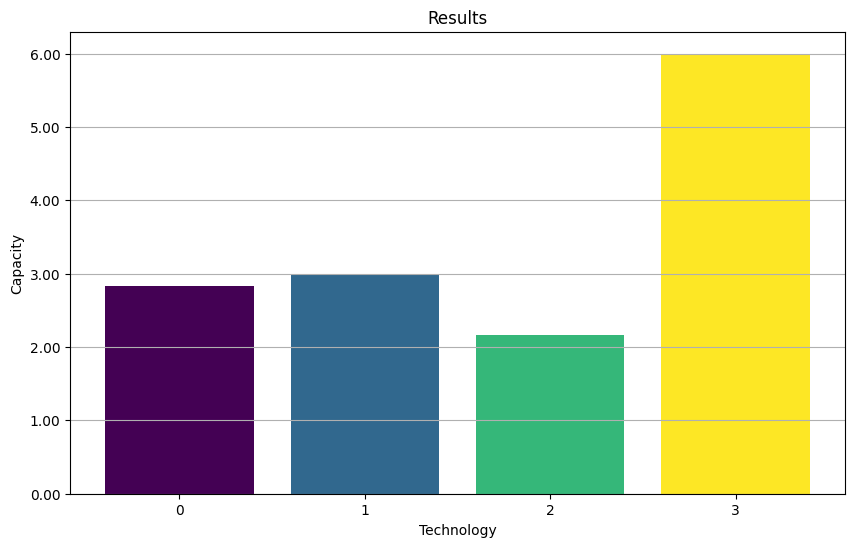

In [2]:

c = [10.,7.,16.,6.]  #costs for instalation
c=c 
#costs
c= c+[v*i for v in [10,6,1]   for i in [4,4.5,3.2,5.5]]

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*n+[0]*(len(c)-n)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:n]+[0]*(len(c)-n)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*i+[-1]+[0]*(k-i)+(([0]*i+[1]+[0]*(k-i))*k) for i in range(n)]
bub = bub+ [0]*n

#power requirement
Aub = Aub + [[0]*(n+n*i)+[-1]*n+[0]*(len(c)-8-n*i) for i in range(k)]
bub = bub + [-5,-3,-2]

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res= problem.solve(solver = cp.GUROBI)
avres=list(x.value[0:n])
precost=sum([c[i]*x.value[i] for i in range(n)])
prodcost=sum([c[i]*x.value[i] for i in np.arange(n,len(x.value))])
pl.print_solution(x,c,n)
pl.plot_result(x,c,n)

### Expected Value Solution

In [3]:
#function to test the average sollution in practice
#c = [10.,7.,16.,6.]  #costs for instalation
#costs
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]

c= [v*i*p for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5] ]#add cost of usage

#phase 1 constraints
#energy requirement constraign
#Aub = [[-1]*4+[0]*(len(c)-4)]
#bub=[-7-4-3]
#budget
#Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
#bub.append(120)

#phase 2 constraints
#capacity
Aub =[[0]*(12*j)+(([0]*i+[1]+[0]*(3-i))*3)+[0]*(len(c)-12-12*j ) for j in range(len(probs)) for i in range(n) ]
bub =  avres*len(probs)

#power requirement
Aub = Aub + [[0]*(4*i+12*j)+[-1]*4+[0]*(len(c)-4-4*i-12*j) for j in range(len(probs)) for i in range(k)]

bub = bub +[i  for t in range(len(demands)) for i in demands[t] ] 

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res3= problem.solve(solver = cp.GUROBI)
print(res3+precost)

399.5926666666667


### Recourse Problem

[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
328
[0, 0, 0, 

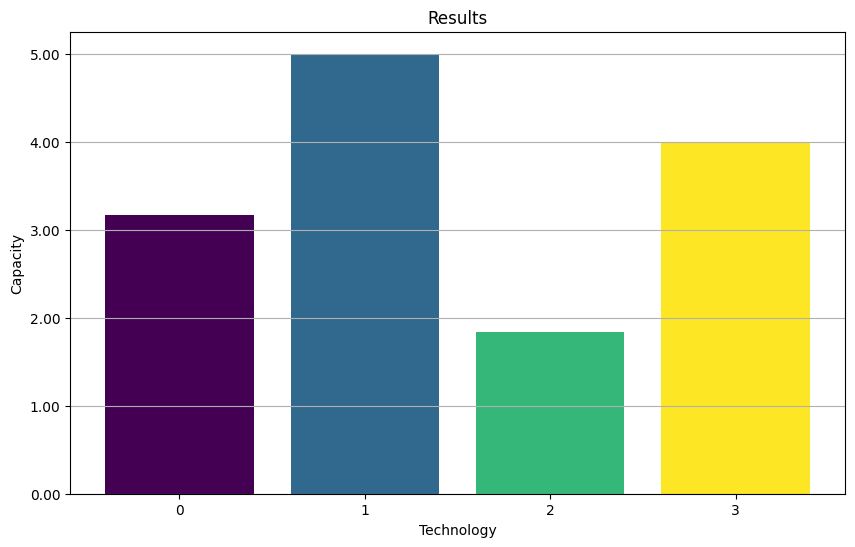

In [4]:
c = [10.,7.,16.,6.]  #costs for instalation
#costs
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]

c= c+[v*i*p for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5] ]#add cost of usage

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*4+[0]*(len(c)-4)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*(i )+[-1]+[0]*(3-i+12*k)+(([0]*i+[1]+[0]*(3-i))*3)+[0]*(len(c)-16-12*k ) for k in range(len(probs)) for i in range(4) ]
print(Aub[-1])
print(len(c))
bub = bub+ [0]*4*len(probs)

#power requirement
Aub = Aub + [[0]*(4+4*i+12*k)+[-1]*4+[0]*(len(c)-8-4*i-12*k) for k in range(len(probs)) for i in range(3)]
print(Aub[-1])

bub = bub +[i  for t in range(len(demands)) for i in demands[t] ] 

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res2= problem.solve(solver = cp.GUROBI)
pl.print_solution(x,c,n)
pl.plot_result(x,c,n)

### Perfect Information

In [5]:
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
c = [10.,7.,16.,6.]  #costs for instalation
#costs
c= c+[v*i for v in [10,6,1]   for i in [4,4.5,3.2,5.5]]

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*4+[0]*(len(c)-4)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*i+[-1]+[0]*(3-i)+(([0]*i+[1]+[0]*(3-i))*3) for i in range(n)]
bub = bub+ [0]*n

#power requirement
Aub = Aub + [[0]*(4+4*i)+[-1]*4+[0]*(len(c)-8-4*i) for i in range(k)]

costs = []
for a in range(len(demands)):
    #costs = costs+[linprog(c=c, A_ub = Aub, b_ub = bub+(demands[a])).fun*probs[a]]
    #print(sum(costs))  
    x=cp.Variable(len(c))
    Aub = np.array(Aub)
    c= np.array(c)
    b_ub_temp = np.array(bub+demands[a])
    restricts=[Aub @ x <= b_ub_temp]+ [x >= 0]
    problem = cp.Problem(cp.Minimize(c.T @x),restricts )

    costs=costs+[problem.solve(solver = cp.GUROBI)*probs[a]]
print(f"Total costs: {sum(costs)}")

Total costs: 394.9666666666667


## Part 2

[0, 1, 2, 3]
4054
-var901[4049 4050 4051 4052 4053] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var901[3] @ 0.9686096414221271 + -var901[4042 4047 4052] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 408.6540557284807
Capacity of each technology: [5.87670586 5.18180517 0.         1.46227603 3.        ]
Investment costs for phase 1: 104.13735101420004
Production costs for phase 2: 304.51670471428


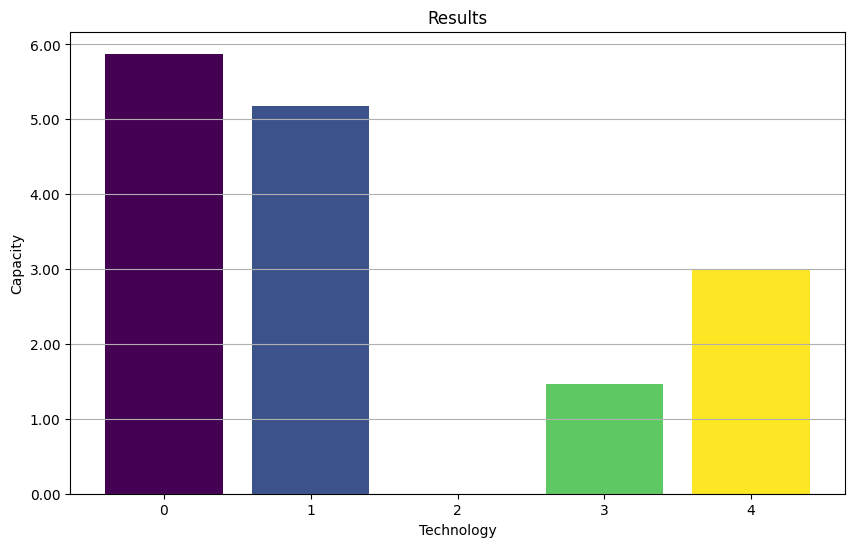

Time taken in seconds 1.9573159217834473


In [6]:
nreal = 10
n=5
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)
print(f'Time taken in seconds {t2-t1}')

[0, 1, 2, 3]
14179
-var41448[14174 14175 14176 14177 14178] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var41448[3] @ param41447[139] + -var41448[14167 14172 14177] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 409.5437167085977
Capacity of each technology: [6.30236619 4.76038844 0.         1.51553649 3.        ]
Investment costs for phase 1: 105.53217136404363
Production costs for phase 2: 304.0115453445523


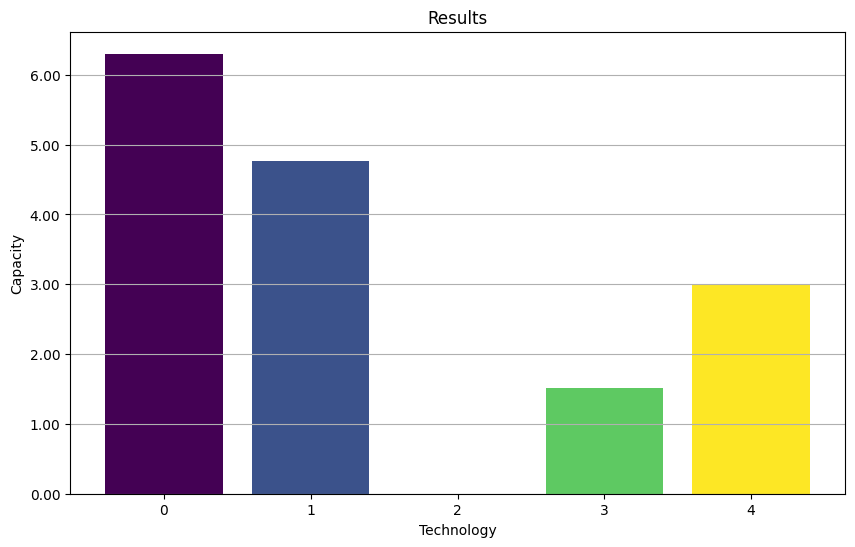

Time taken in seconds 94.04924607276917


In [7]:
nreal = 35
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)
print(f'Time taken in seconds {t2-t1}')

Objective value: 410.3110627009409
Capacity of each technology: [5.79770802 5.28481342 0.         1.46070149 3.        ]
Investment costs for phase 1: 103.82755448814862
Production costs for phase 2: 306.4835082127937


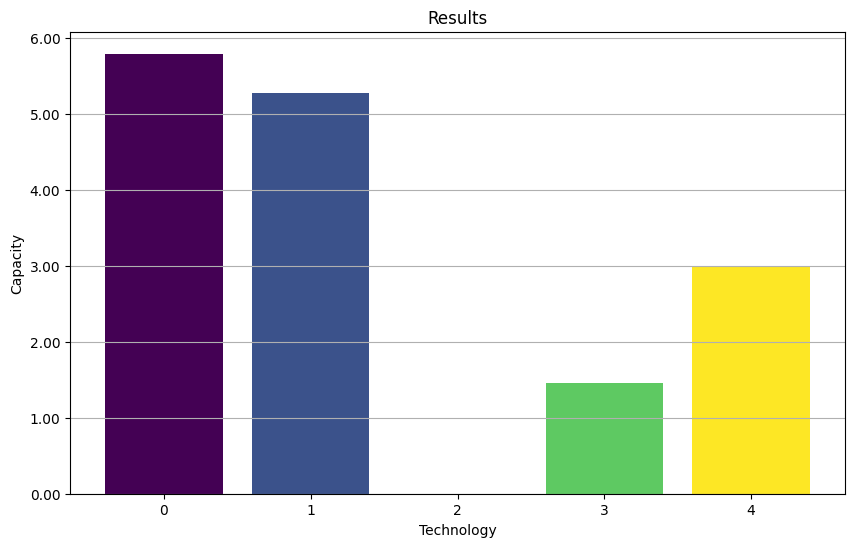

In [8]:
rndvl= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

In [9]:
params =[]
values = []
for o in tqdm(range(150)):
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]

100%|██████████| 150/150 [01:07<00:00,  2.22it/s]


[np.float64(410.7192436330353), np.float64(411.72404646620424), np.float64(411.1821851124334), np.float64(410.5250660270477), np.float64(411.35766779156324), np.float64(411.2293188961578), np.float64(409.29682225779345), np.float64(409.6727663596621), np.float64(413.4081013131151), np.float64(409.24935010940226), np.float64(410.58076788275827), np.float64(412.5355396011551), np.float64(410.41601410938983), np.float64(410.2882429371516), np.float64(410.12858405371253), np.float64(411.1762814078451), np.float64(410.5488372156965), np.float64(412.1761868758629), np.float64(410.48134956043816), np.float64(412.1619508931412), np.float64(411.6990143262709), np.float64(409.42375132843006), np.float64(409.2026641747121), np.float64(410.7997071751681), np.float64(409.44334567594433), np.float64(411.7592586423024), np.float64(410.49366544480563), np.float64(413.2004932414846), np.float64(410.852844048462), np.float64(412.24853040337183), np.float64(410.90344018288056), np.float64(409.92097249652

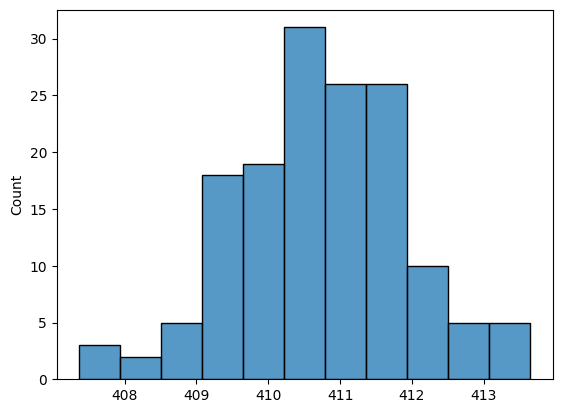

In [10]:
import seaborn
import pandas
print(values)
print(params)
seaborn.histplot(values)
paramar = pandas.DataFrame(params,columns=["one","two","three","four"] )
print(max(paramar["three"]))

[0, 1, 2, 3]
405
-var190805[400 401 402 403 404] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= param190806[3] @ param190804[3] + -var190805[393 398 403] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 239.71654913637363
Capacity of each technology: [0. 0. 3. 0. 0.]
Investment costs for phase 1: 2.592
Production costs for phase 2: 237.12454913637362


/Users/ecastillo/personal/rug/Optimization-under-Uncertainty/venv/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:237: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


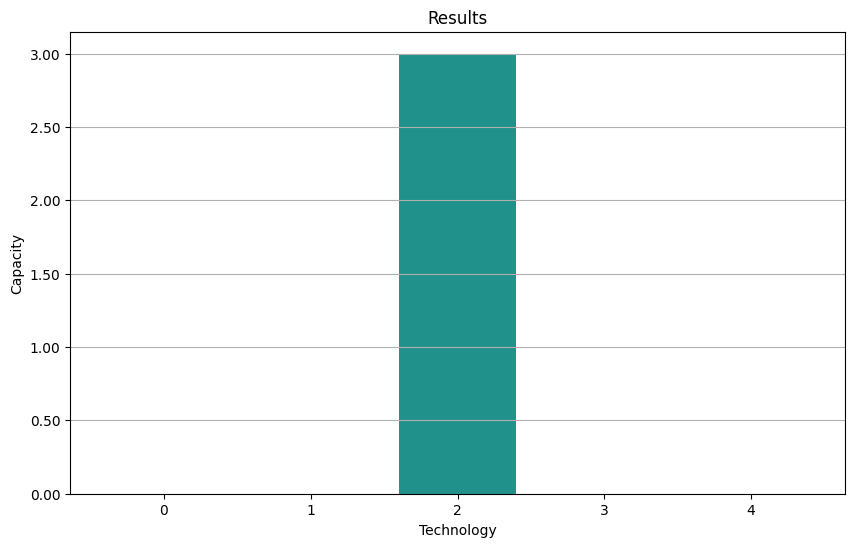

Time taken in seconds 0.12301087379455566


In [11]:
cases = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/cases for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = costsvec*cases

rqual= np.random.uniform(size=cases*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
rqual = cp.Parameter(shape=cases*4 ,value=[rqual[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)])

#randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)]
x=cp.Variable(len(cset) )
capacities= cp.Parameter(shape=4, value=[10]*4)

#phase 1 constraints
#budget
constr = [x>=0]
#constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5]@multidin2<= demands[(k//3)%27][k%3] for k in range(cases*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([0,5,10]) 
multiding = np.array([1,1,1])
constr = constr + [capacities[k]*rqual[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*cases) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
lilproblem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= lilproblem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)
print(f'Time taken in seconds {t2-t1}')

In [12]:
ntests=50
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
valuevector = []
for Val in tqdm(range(len(params))):
    capacities.value = params[Val]
    curval =params[Val]@[10.,7.,16.,6.]
    for t in rndvl:
        rqual.value = t
        lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
        curval = curval +lilproblem.value/ntests
    valuevector = valuevector +[curval]

[[np.float64(0.7135088014602768), np.float64(0.74527781838625), np.float64(0.6021254187264871), np.float64(0.9421479816928648)], [np.float64(0.7109433973437073), np.float64(0.7472052567313097), np.float64(0.7691907469740127), np.float64(0.9333921130987921)], [np.float64(0.6046174484657405), np.float64(0.7450419388023702), np.float64(0.6049380239496726), np.float64(0.9295494448794035)], [np.float64(0.7961037816581158), np.float64(0.770225899918934), np.float64(0.635710971124802), np.float64(0.9837760060874439)], [np.float64(0.825522474373307), np.float64(0.7996514976346561), np.float64(0.6333821534622044), np.float64(0.9137410825344636)], [np.float64(0.6271269025909973), np.float64(0.7149576502554033), np.float64(0.5279700563609362), np.float64(0.9626866112194054)], [np.float64(0.78929329182303), np.float64(0.7792032096285947), np.float64(0.6711105650256893), np.float64(0.9848265022986575)], [np.float64(0.6817428032363212), np.float64(0.7548193362538332), np.float64(0.6295344457591387),

100%|██████████| 150/150 [15:41<00:00,  6.28s/it]


[5.86999073 5.20368962 0.         1.59707207]
410.50163553177805
104.70816708619256


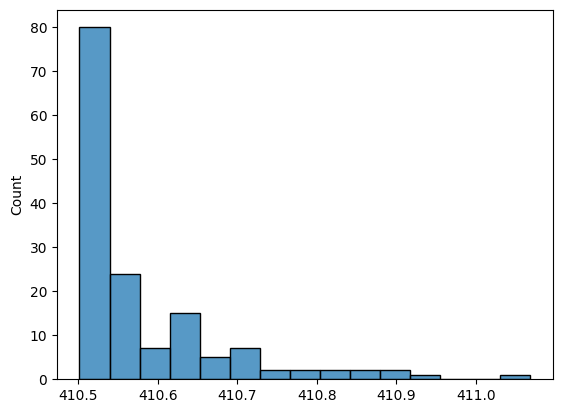

In [13]:
seaborn.histplot(valuevector)

print(params[ valuevector.index(min(valuevector))])
optipars = params[ valuevector.index(min(valuevector))]
print(min(valuevector))
print(sum( [params[ valuevector.index(min(valuevector))][k]*[10.,7.,16.,6.][k] for k in range(4)]))

In [14]:
paramar.to_csv("BackupStorage-paramtests")
pandas.DataFrame(valuevector).to_csv("BackupStorage-results")
pandas.DataFrame(values).to_csv("BackupStorage-initialoutcomes")



In [15]:
import pandas
paramar = pandas.read_csv("BackupStorage-paramtests")
paramar = paramar[["one", "two", "three", "four"]]
params = paramar.values.tolist()
valuevector = pandas.read_csv("BackupStorage-results")
valuevector = valuevector["0"].to_list()
values  =pandas.read_csv("BackupStorage-initialoutcomes")
values = values["0"].to_list()
t=[0,0,2]

### Expected Value Problem

[0, 1, 2, 3]
409
-var22350522[404 405 406 407 408] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var22350522[3] @ 0.9500000000000001 + -var22350522[397 402 407] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 409.7052456140353
Capacity of each technology: [6.66666667 4.         0.         2.10526316 3.        ]
Investment costs for phase 1: 110.53824561403509
Production costs for phase 2: 299.167


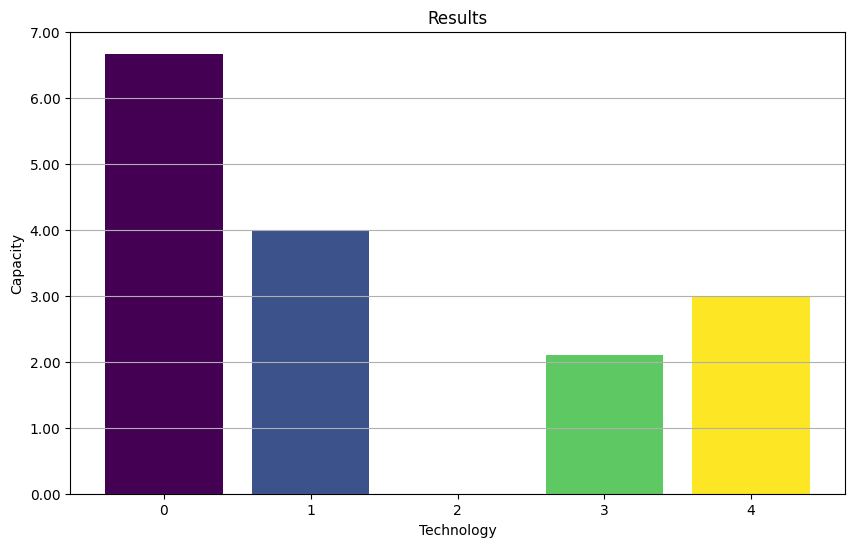

Time taken in seconds 0.1385653018951416


In [16]:
nreal = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= [0.5]*4
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

avph11= x.value[0:4]

In [17]:
ntests=1000
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
Vtestvec = []
#curval =sum([optipars[i]*[10.,7.,16.,6.][i] for i in range(4)]) 
curval =avph11@[10.,7.,16.,6.]
print(curval)
q = 0
for t in rndvl:
    print(q)
    rqual.value = t
    lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
    Vtestvec =Vtestvec+[curval +lilproblem.value] 
    q=q+1
print(np.mean(Vtestvec))
print(np.sqrt(np.var(Vtestvec)))

[[np.float64(0.6268557450715364), np.float64(0.7410418485783613), np.float64(0.6895267003605741), np.float64(0.988229412123031)], [np.float64(0.7834396149694413), np.float64(0.7371738472021192), np.float64(0.5803297576252517), np.float64(0.9646723381978102)], [np.float64(0.8025201094269434), np.float64(0.741333016785972), np.float64(0.5313833944441608), np.float64(0.9959654048607518)], [np.float64(0.729074787891294), np.float64(0.717501752274676), np.float64(0.5494302702965184), np.float64(0.9904173845466956)], [np.float64(0.7780115606970166), np.float64(0.7973259412930455), np.float64(0.7250943933056142), np.float64(0.9349579969600923)], [np.float64(0.6258304686553303), np.float64(0.7012028270101015), np.float64(0.7438569781796831), np.float64(0.9302062379645331)], [np.float64(0.8312521949769225), np.float64(0.7671631901096241), np.float64(0.7134155949093437), np.float64(0.965453361956195)], [np.float64(0.8862504278959892), np.float64(0.7585148541818895), np.float64(0.5813725994006458

In [18]:
import scipy
import scipy.spatial
Tree = scipy.spatial.KDTree(params)
print(Tree.query(avph11))
print(params[Tree.query(avph11)[1]] )
print(valuevector[Tree.query(avph11)[1]])
min(valuevector)
print(avph11)
for k in paramar.columns:
    print(k)
    print(np.mean(paramar[k]))
    print(np.var(paramar[k]))

(0.35229078949290016, np.int64(10))
[6.596129811375525, 4.179103980396966, 0.0, 1.8102121172032477]
410.6590354944972
[6.66666667 4.         0.         2.10526316]
one
5.66937210197736
0.41879986930080415
two
5.380433997229203
0.5575031518095095
three
0.0
0.0
four
1.5903020222759456
0.01224617308545571


### Perfect Information

[0, 1, 2, 3]
409
-var25308619[404 405 406 407 408] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var25308619[3] @ param25308618[3] + -var25308619[397 402 407] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 401.7710767611792
Capacity of each technology: [8.38530925 2.63234131 0.         1.06401585 3.        ]
Investment costs for phase 1: 111.90357676117885
Production costs for phase 2: 289.8675000000001


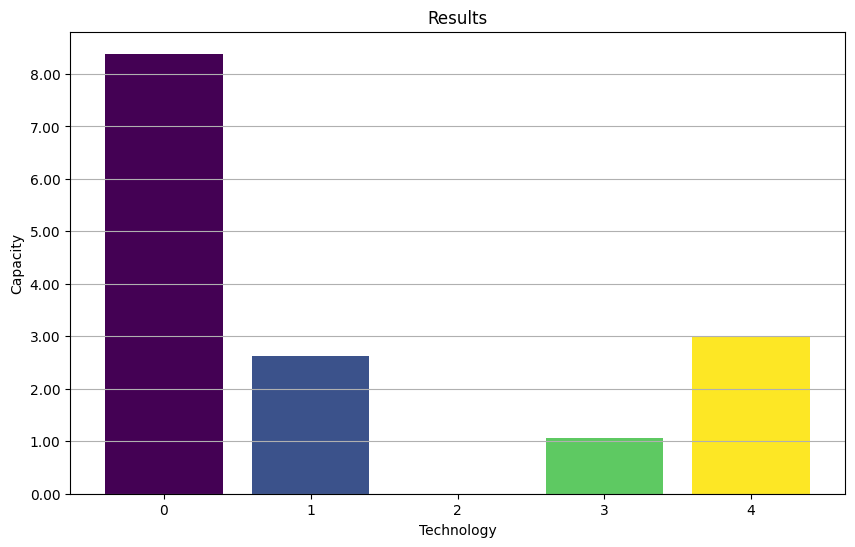

Time taken in seconds 0.17702794075012207


In [19]:
nreal = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

In [20]:
params =[]
values = []
for o in tqdm(range(4000)):
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]

100%|██████████| 4000/4000 [00:29<00:00, 137.04it/s]


In [21]:
np.mean(values)

np.float64(407.5206075047016)

<Axes: ylabel='Count'>

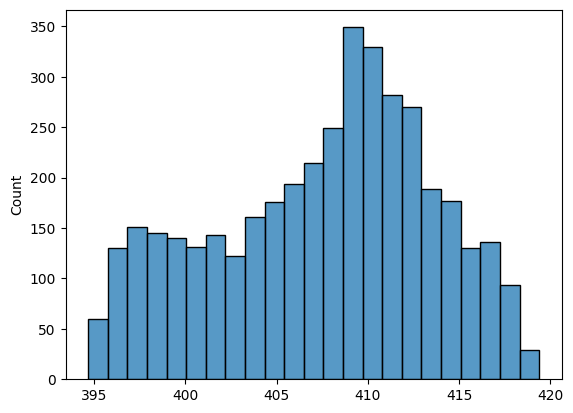

In [22]:
seaborn.histplot(values)

## 3

In [14]:
nreal = 19
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
ps = [0.6,0.4]
ts2 = [5,7.5]
ts3 = [0.5,1.75]
timecostvecs = [[10*ps[a]*ps[b],ts2[a]*ps[a]*ps[b],ts3[b]*ps[a]*ps[b]] for a in range(2) for b in range(2)]
costsvec= [v*i*p/nreal for p in probs for t in range(4) for v in timecostvecs[t]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage

cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals =  cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
print(len(cset))

base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//12)%27][k%3] for k in range(nreal*27*3*4)]
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//108)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(108*nreal) for k in range(4)]

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

30784
[0, 1, 2, 3]
-var122540[30779 30780 30781 30782 30783] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var122540[3] @ param122539[75] + -var122540[30772 30777 30782] @ [1. 1. 1.]


In [ ]:
rndvl= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
print(x.value[0:4])
print(problem.value)
print(x.value[0:4]@[0.9,0.8,0.8,1.])
print(x.value[0:4]@cinstall)

In [ ]:
params =[]
values = []
for o in tqdm(range(150)):
    print(o)
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]
print(values)
print(params)
sns.histplot(values)    

In [ ]:
paramar = pd.DataFrame(params,columns=["one","two","three","four"] )
print(max(paramar["three"]))
sns.histplot(paramar,binwidth=0.5)

In [ ]:
cases = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
ps = [0.6,0.4]
ts2 = [5,7.5]
ts3 = [0.5,1.75]
timecostvecs = [[10*ps[a]*ps[b],ts2[a]*ps[a]*ps[b],ts3[b]*ps[a]*ps[b]] for a in range(2) for b in range(2)]
costsvec= [v*i*p/cases for p in probs for t in range(4) for v in timecostvecs[t]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage

cset = costsvec*cases

randvals= np.random.uniform(size=cases*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals =  cp.Parameter(shape=cases*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)])
x=cp.Variable(len(cset) )

capacities =cp.Parameter(shape=4, value=[3,3,3,3])
#phase 1 constraints
#budget
constr = [x>=0]
#constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
print(len(cset))

base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5]@multidin2<= demands[(k//12)%27][k%3] for k in range(cases*27*3*4)]
print([0,1,2,3,4][0:4])
print(constr[-1])
#capacity
base= np.array([0,5,10]) 
multiding = np.array([1,1,1])
constr = constr + [capacities[k]*randvals[(v//108)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(108*cases) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
lilproblem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= lilproblem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

In [ ]:
ntests=50
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
valuevector = []
for Val in tqdm(range(len(params))):
    print(Val)
    capacities.value = params[Val]
    curval =params[Val]@[10.,7.,16.,6.]
    for t in rndvl:
        randvals.value = t
        lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
        curval = curval +lilproblem.value/ntests
    valuevector = valuevector +[curval]

In [ ]:
sns.histplot(valuevector)

In [ ]:
pd.DataFrame(params).to_csv("BackupStorage-paramtests2-B")
pd.DataFrame(valuevector).to_csv("BackupStorage-results2-B")
pd.DataFrame(values).to_csv("BackupStorage-initialoutcomes2-B")

In [ ]:
nreal = 30
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,6.]   #costs for instalation
#costs
ps = [0.6,0.4]
ts2 = [5,7.5]
ts3 = [0.5,1.75]
timecostvecs = [[10*ps[a]*ps[b],ts2[a]*ps[a]*ps[b],ts3[b]*ps[a]*ps[b]] for a in range(2) for b in range(2)]
costsvec= [v*i*p/nreal for p in probs for t in range(4) for v in timecostvecs[t]   for i in [4,4.5,5.5, 10] ]#add cost of usage

cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*3)
mins = [0.6,0.7,0.9]
adds = [0.3,0.1,0.1] 
randvals =  cp.Parameter(shape=nreal*3 ,value= [randvals[x*3+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(3)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:3]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
print(len(cset))

base= np.array([0,1,2,3]) 
multidin2 = np.array([1,1,1,1])
constr = constr + [-x[base[0]+k*4+3]-x[base[1]+k*4+3]-x[base[2]+k*4+3]-x[base[3]+k*4+3]<= demands[(k//12)%27][k%3] for k in range(nreal*27*3*4)]
print([0,1,2,3,4][0:4])
print(constr[-1])
#capacity
base= np.array([3,7,11]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//108)*3+k]-x[base[0]+k+v*12]-x[base[1]+k+v*12] -x[base[2]+k+v*12]>=0.  for v in range(108*nreal) for k in range(3)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

In [ ]:
rndvl= np.random.uniform(size=nreal*3)
mins = [0.6,0.7,0.9]
adds = [0.3,0.1,0.1] 
randvals.value = [rndvl[x*3+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(3)]
res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
print(x.value[0:3])
print(problem.value)
print(x.value[0:3]@[0.9,0.8,1.])
print(x.value[0:3]@cinstall)

In [ ]:
params2 =[]
values2 = []
for o in tqdm(range(300)):
    rndvl= np.random.uniform(size=nreal*3)
    randvals.value = [rndvl[x*3+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(3)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values2 = values2 + [problem.value]
    params2 = params2 + [x.value[0:3]]

In [ ]:
print(values2)
#print(params2)
sns.histplot(values2)
paramar2 = pd.DataFrame(params2,columns=["one","two","four"] )


In [ ]:
paramar2.to_csv("BackupStorage-paramtests2")
#pandas.DataFrame(valuevector).to_csv("BackupStorage-results2")
pd.DataFrame(values2).to_csv("BackupStorage-initialoutcomes2")

### Cross Validation

In [ ]:
cases = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,6.]   #costs for instalation
#costs
ps = [0.6,0.4]
ts2 = [5,7.5]
ts3 = [0.5,1.75]
timecostvecs = [[10*ps[a]*ps[b],ts2[a]*ps[a]*ps[b],ts3[b]*ps[a]*ps[b]] for a in range(2) for b in range(2)]
costsvec= [v*i*p/cases for p in probs for t in range(4) for v in timecostvecs[t]   for i in [4,4.5,5.5, 10] ]#add cost of usage

cset = costsvec*cases

randvals= np.random.uniform(size=cases*3)
mins = [0.6,0.7,0.9]
adds = [0.3,0.1,0.1] 
randvals =  cp.Parameter(shape=cases*3 ,value= [randvals[x*3+k]*adds[k]+mins[k]  for x in range(cases) for k in range(3)])
x=cp.Variable(len(cset) )
suppl = cp.Parameter(shape=3, value=[4,4,4])

#phase 1 constraints
#budget
constr = [x>=0]
#constr = constr+[x[0:3]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
print(len(cset))

base= np.array([0,1,2,3]) 
multidin2 = np.array([1,1,1,1])
constr = constr + [-x[base[0]+k*4]-x[base[1]+k*4]-x[base[2]+k*4]-x[base[3]+k*4]<= demands[(k//12)%27][k%3] for k in range(cases*27*3*4)]
print([0,1,2,3,4][0:4])
print(constr[-1])
#capacity
base= np.array([0,4,8]) 
multiding = np.array([1,1,1])
constr = constr + [suppl[k]*randvals[(v//108)*3+k]-x[base[0]+k+v*12]-x[base[1]+k+v*12] -x[base[2]+k+v*12]>=0.  for v in range(108*cases) for k in range(3)]
print(constr[-1])

cset = np.array(cset)
lilproblem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= lilproblem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

In [ ]:
rndvl= np.random.uniform(size=nreal*3)
mins = [0.6,0.7,0.9]
adds = [0.3,0.1,0.1] 
randvals.value = [rndvl[x*3+k]*adds[k]+mins[k]  for x in range(cases) for k in range(3)]
res= lilproblem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
print(x.value[0:3])
print(lilproblem.value)
print(x.value[0:3]@[0.9,0.8,1.])
print(x.value[0:3]@cinstall)

In [ ]:
tests=60
valuevector =[]
parsset = paramar2.to_numpy()
testpars = [[rndvl[x*3+k]*adds[k]+mins[k]  for x in range(cases) for k in range(3)] for p in range(tests)]
for t in tqdm(range(len(paramar2))):
    suppl.value = parsset[t]
    curv = parsset[t]@[10.,7.,6.]
    for q in testpars:
        randvals.value =q
        res= lilproblem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
        curv = curv + lilproblem.value/tests
    valuevector = valuevector+[curv]

In [ ]:
print(valuevector)
pd.DataFrame(valuevector).to_csv("BackupStorage-results2")
sns.histplot(valuevector)
print(min(valuevector))
print(parsset[valuevector.index(min(valuevector))] )

In [ ]:
tests=150
valuevectortest =[]
parsset = paramar2.to_numpy()
testpars = [[rndvl[x*3+k]*adds[k]+mins[k]  for x in range(cases) for k in range(3)] for p in range(tests)]
for t in tqdm(range(300)):
    suppl.value = parsset[t]
    curv = parsset[t]@[10.,7.,6.]
    for q in testpars:
        randvals.value =q
        res= lilproblem.solve(  solver  = cp.GUROBI, env=env)
        curv = curv + lilproblem.value/tests
    valuevectortest = valuevectortest+[curv]

In [ ]:
sns.histplot(valuevectortest)
pd.DataFrame(valuevectortest).to_csv("BackupStorage-results2-2")